## Выпускная квалификационная работа Яневица Рональда Бруновича
### студента группы 15702 курса "Data Science PRO" ЦДО МГТУ им. Н.Э. Баумана
#### Тема исследования "Прогнозирование конечных свойств новых материалов (композиционных материалов)".
## Часть 2
### 3. Создание нейронной сети, которая будет рекомендовать: 'Соотношение матрица-наполнитель'

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, max_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Необходимо обучить алгоритм машинного обучения, который будет определять значения:
# 1. Модуль упругости при растяжении, ГПа;
# 2. Прочность при растяжении, МПа.
# При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей. 
# При построении моделей провести поиск гиперпараметров модели с помощью поиска по сетке с перекрестной проверкой, количество блоков равно 10.
# 
# Написать нейронную сеть, которая будет рекомендовать:
# 3. Соотношение матрица-наполнитель.
# 
# Таким образом, нам надо решить 3 задачи, для каждой надо создать входные данные, причём набор признаков для каждой будет один, т.е.
# надо создать один массив Х и 3 массива Y.

cleaned_df = pd.read_excel("CleanedDataFrame.xlsx", index_col='Unnamed: 0')
cleaned_df['Угол нашивки'] = cleaned_df['Угол нашивки'].astype('category')
cleaned_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Плотность,813.0,NaN,NaN,NaN,1973.305080,69.536751,1801.940695,1923.566230,1976.800187,2019.065966,2150.793053
Модуль упругости,813.0,NaN,NaN,NaN,731.777187,326.047734,2.436909,496.873650,724.109184,951.030579,1588.677217
Количество отвердителя,813.0,NaN,NaN,NaN,111.346533,26.594886,41.886277,93.290977,111.259275,130.163998,181.828448
Содержание эпоксидных групп,813.0,NaN,NaN,NaN,22.143151,2.343374,15.881668,20.555344,22.130284,23.914238,28.620116
Температура вспышки,813.0,NaN,NaN,NaN,286.077341,39.538176,186.508613,258.370169,286.302097,313.046103,385.894771
Поверхностная плотность,813.0,NaN,NaN,NaN,480.130547,275.945272,0.603740,264.538975,453.919475,691.280873,1238.476416
Потребление смолы,813.0,NaN,NaN,NaN,217.511640,56.121929,72.530873,180.329055,217.481262,255.304191,359.052220
Угол нашивки,813.0,2.0,90.0,455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Шаг нашивки,813.0,NaN,NaN,NaN,6.912574,2.473641,0.145034,5.167349,6.936649,8.582372,13.484945
Плотность нашивки,813.0,NaN,NaN,NaN,58.431672,9.194747,39.338977,51.690374,58.271705,64.798020,80.031619


In [4]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 1 to 1021
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Плотность                        813 non-null    float64 
 1   Модуль упругости                 813 non-null    float64 
 2   Количество отвердителя           813 non-null    float64 
 3   Содержание эпоксидных групп      813 non-null    float64 
 4   Температура вспышки              813 non-null    float64 
 5   Поверхностная плотность          813 non-null    float64 
 6   Потребление смолы                813 non-null    float64 
 7   Угол нашивки                     813 non-null    category
 8   Шаг нашивки                      813 non-null    float64 
 9   Плотность нашивки                813 non-null    float64 
 10  Соотношение матрица_наполнитель  813 non-null    float64 
 11  Прочность при растяжении         813 non-null    float64 
 12  Модуль упруг

In [5]:
# Из очищенного от выбросов датасета создаём один массив признаков Х и 3 массива целевых переменных Y.

X_columns = [
  'Плотность', 
  'Модуль упругости',
  'Количество отвердителя', 
  'Содержание эпоксидных групп',
  'Температура вспышки', 
  'Поверхностная плотность',
  'Потребление смолы', 
  'Угол нашивки',
  'Шаг нашивки', 
  'Плотность нашивки'
]

y1_columns = ['Прочность при растяжении']
y2_columns = ['Модуль упругости при растяжении']
y3_columns = ['Соотношение матрица_наполнитель']

X = cleaned_df.loc[:, X_columns]
y1 = cleaned_df.loc[:, y1_columns]
y2 = cleaned_df.loc[:, y2_columns]
y3 = cleaned_df.loc[:, y3_columns]


In [6]:
print(X.info())
print("=" * 70)
print(y1.info())
print("=" * 70)
print(y2.info())
print("=" * 70)
print(y3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 1 to 1021
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Плотность                    813 non-null    float64 
 1   Модуль упругости             813 non-null    float64 
 2   Количество отвердителя       813 non-null    float64 
 3   Содержание эпоксидных групп  813 non-null    float64 
 4   Температура вспышки          813 non-null    float64 
 5   Поверхностная плотность      813 non-null    float64 
 6   Потребление смолы            813 non-null    float64 
 7   Угол нашивки                 813 non-null    category
 8   Шаг нашивки                  813 non-null    float64 
 9   Плотность нашивки            813 non-null    float64 
dtypes: category(1), float64(9)
memory usage: 64.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 1 to 1021
Data columns (total 1 columns):
 #   Column                    N

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 3.0012 - mae: 3.0012 - val_loss: 2.6194 - val_mae: 2.6194
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.6545 - mae: 2.6545 - val_loss: 2.2533 - val_mae: 2.2533
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.2874 - mae: 2.2874 - val_loss: 1.8595 - val_mae: 1.8595
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8725 - mae: 1.8725 - val_loss: 1.4665 - val_mae: 1.4665
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.5146 - mae: 1.5146 - val_loss: 1.1300 - val_mae: 1.1300
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2126 - mae: 1.2126 - val_loss: 0.9676 - val_mae: 0.9676
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0315 - mae: 1.0315 - val_loss: 0.9702 - val_mae: 0.9702
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0533 - mae: 1.0533 - val_loss: 1.0033 - val_mae: 1.0033
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0521 - mae: 

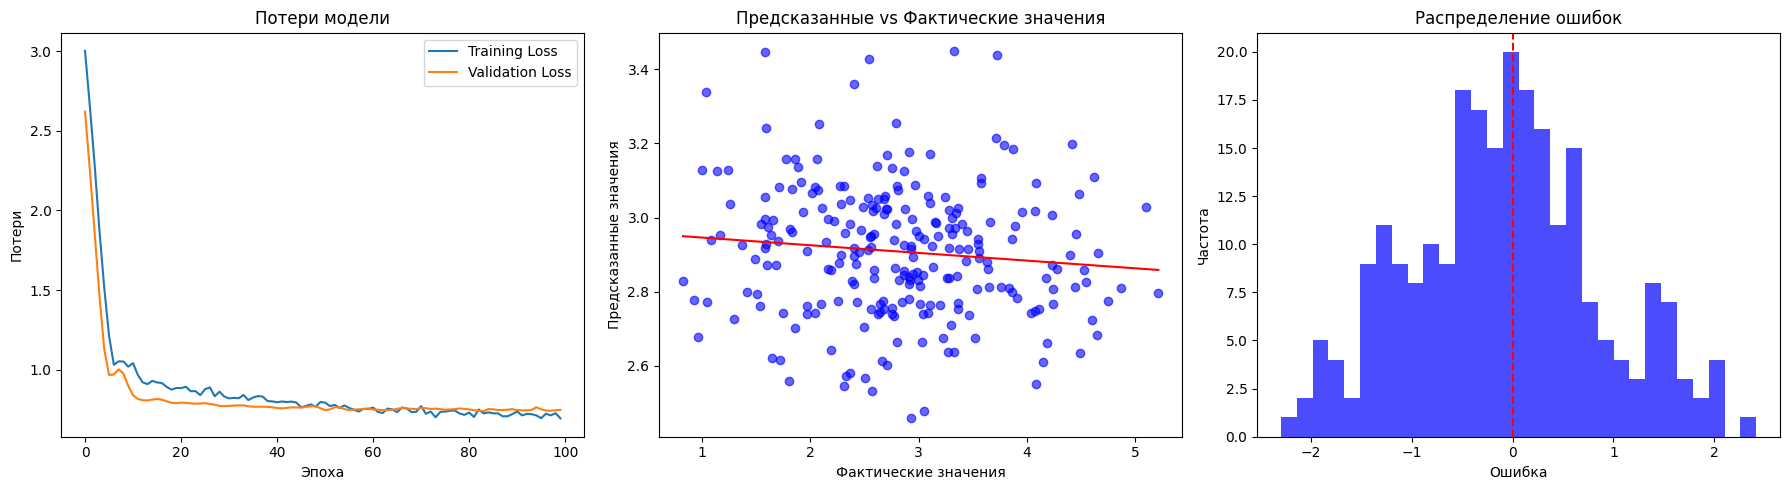

In [7]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.3, random_state=1101)

# Определение числовых и категориальных столбцов
numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# Создание преобразователей для числовых и категориальных данных
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Объединение преобразований в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применение предобработки
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
 
# Определение архитектуры нейросети
model = keras.Sequential([
    layers.Dense(11, activation='relu', input_shape=[X_train_processed.shape[1]]),
    layers.Dropout(0.2),
    layers.Dense(64, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
 
# Компиляция модели
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae']
)

callback1 = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max', min_delta=0.001,
    patience = 5)

# Обучение модели
history = model.fit(
    X_train_processed, y3_train,
    validation_data=(X_test_processed, y3_test),
    callbacks=[callback1],
    epochs=100,
    batch_size=128,
    verbose=1
)
 
# Оценка модели на тестовых данных
test_loss, test_mae = model.evaluate(X_test_processed, y3_test, verbose=0)
print(f"Test MAE: {test_mae:.4f}")
 
# Предсказание на новых данных
y_pred = model.predict(X_test_processed)

# Вычисление метрик качества
r2 = r2_score(y3_test, y_pred) * -1
max_err = max_error(y3_test, y_pred)
mse = mean_squared_error(y3_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y3_test, y_pred)
mape = mean_absolute_percentage_error(y3_test, y_pred)

# Создание датафрейма с метриками
metrics_NeuralNetwork = pd.DataFrame({
    'Метрика': ['R2', 'Max Error', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Значение LinearRegression': [r2, max_err, mse, rmse, mae, mape]
})

# Вывод метрик качества
print("\nМетрики качества на тестовой выборке:")
print(f"R2: {r2:.3f}")
print(f"Max Error: {max_err:.1f}")
print(f"MSE: {mse:.1f}")
print(f"RMSE: {rmse:.1f}")
print(f"MAE: {mae:.1f}")
print(f"MAPE: {mape:.2f}%")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

coefficients = np.polyfit(y3_test.squeeze(), y_pred.squeeze(), 1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line_x = np.linspace(min(y3_test.squeeze()), max(y3_test.squeeze()), 100)
regression_line_y = slope * regression_line_x + intercept

# График потерь модели
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Потери модели')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Потери')
axes[0].legend()
 
# Кросс-плот между предсказанным и фактическим значением
axes[1].scatter(y3_test, y_pred, alpha=0.6, color='Blue')
axes[1].plot(regression_line_x, regression_line_y, color='red')
axes[1].set_xlabel('Фактические значения')
axes[1].set_ylabel('Предсказанные значения')
axes[1].set_title('Предсказанные vs Фактические значения')

# Распределение ошибок
errors = y3_test - y_pred
axes[2].hist(errors, bins=30, alpha=0.7, color='Blue')
axes[2].axvline(x=0, color='r', linestyle='--')
axes[2].set_xlabel('Ошибка')
axes[2].set_ylabel('Частота')
axes[2].set_title('Распределение ошибок')
 
plt.tight_layout()
plt.show()

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,041 (35.32 KB)

 Trainable params: 3,013 (11.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,028 (23.55 KB)